__Кейс 1. EDA по Hourly Energy Consumption и Brent__

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:   
    а) зависимость цены на недвижимость в конкретном регионе от времени,  
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,    
    в) количество отказов компьютера,    
    г) число обращений в поликлинику по району,    
    д) координаты автобуса при движении по маршруту,    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.




__Не совсем понятно задание. В принципе все остветы подходят:   
    а) очевидно подходит   
    б) если скорость не постоянная, и менялась через промежутки времени, то время полёта, и скорость полёта, можно описать временным рядом.   
    в) очевидно, что чаще компьютеры отказывают, когда за ними работает большее количество людей, что опять же завивст от времени, так что это тоже подходит.   
    г) вероятно, что при сезонных обострениях гриппа, в поликлинику обращется больше народа, это нам тоже подходит.   
    д) аналогично примеру с самолётом   
    е) время кадра, координаты__

***
__2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('../lesson1/DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [2]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


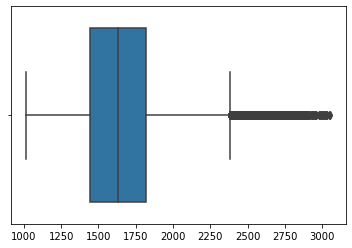

In [4]:
sns.boxplot(data.values)

In [5]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

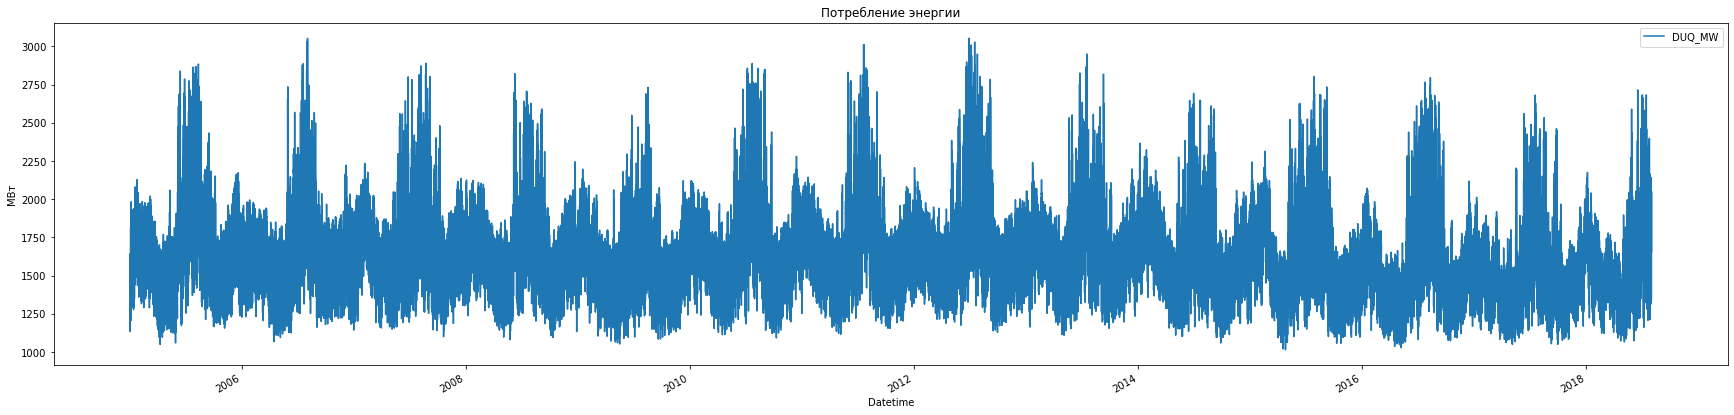

In [6]:
data.plot( figsize = ( 30, 7 ), title = 'Потребление энергии' )
plt.ylabel ( 'МВт' )

Описание:
- интервал изменения индексов от 2005-12-31 01:00:00 до 2018-01-02 00:00:00
- пропусков  нет
- наблюдаются сезонные колебания, аномалий нет


***
__3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.__



In [7]:
brent_data = pd.read_excel('../lesson1/brent_2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data_month = brent_data.resample("M").mean()
brent_data_week = brent_data.resample("W").mean()


In [8]:
print('all data: \t\t',  brent_data.shape[0])
print('resample by week: \t',  brent_data_week.shape[0])
print('resemple by month: \t',  brent_data_month.shape[0])

all data: 		 2667
resample by week: 	 470
resemple by month: 	 109


***
__4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.__


In [9]:
brent_data_year = brent_data.resample("y").mean()


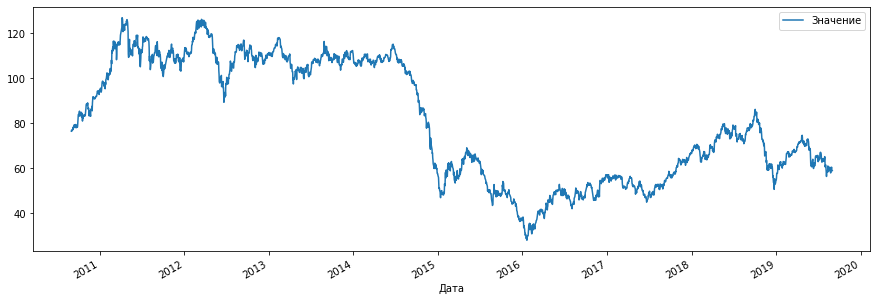

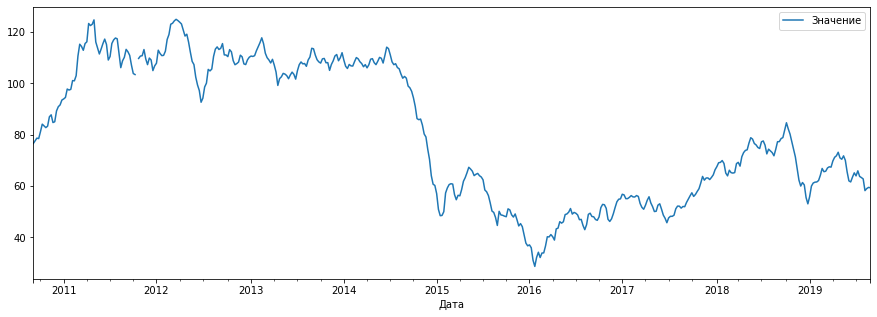

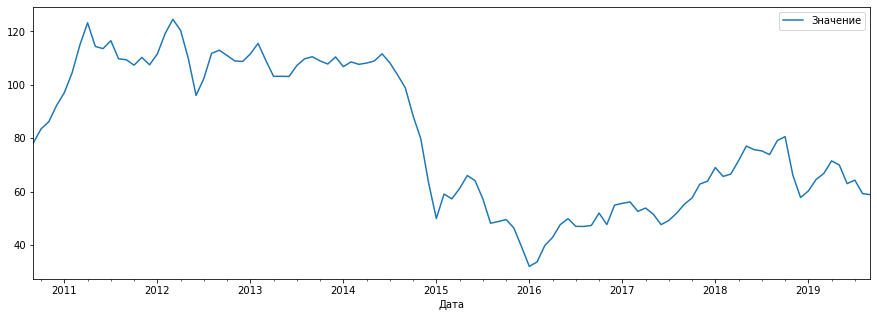

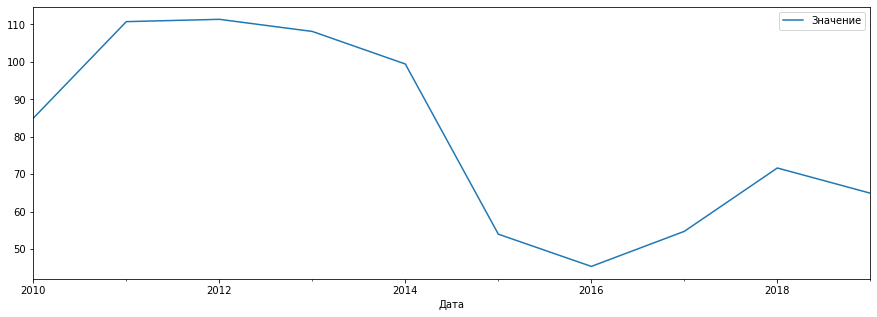

In [10]:
brent_data.plot( figsize = ( 15, 5 ))
brent_data_week.plot( figsize = ( 15, 5 ))
brent_data_month.plot( figsize = ( 15, 5 ))
brent_data_year.plot( figsize = ( 15, 5 ))
plt.show()

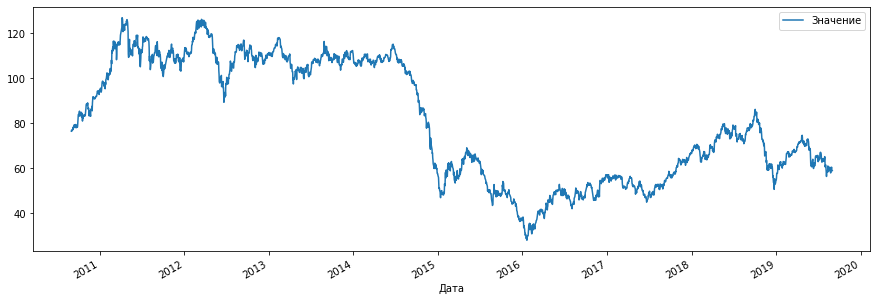

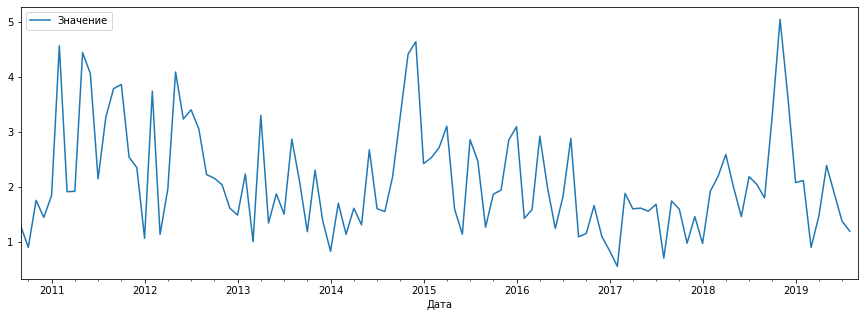

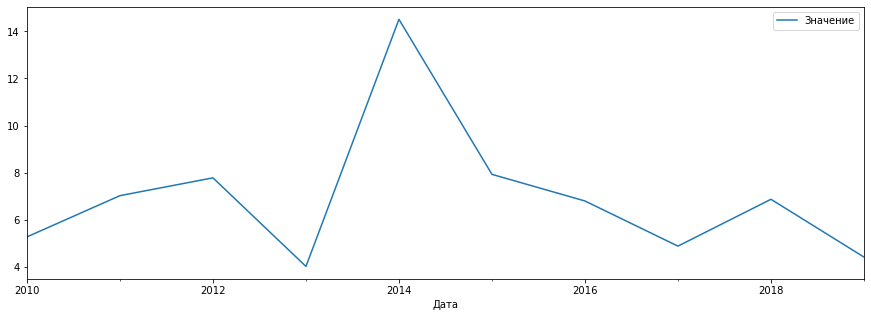

In [11]:
brent_data_month = brent_data.resample("M").std()
brent_data_week = brent_data.resample("W").std()
brent_data_year = brent_data.resample("Y").std()

brent_data.plot( figsize = ( 15, 5 ))
brent_data_month.plot( figsize = ( 15, 5 ))
brent_data_year.plot( figsize = ( 15, 5 ))

***
__5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.__

Для среднего: скаждым с уменьшением количества детелизации, мы видим сглаживание графика.
Для средне квадратичного отклонения: скаждым с уменьшением количества детелизации, откланение становится всё больше, и конечный график уже очень отличает от первонатального, даже форма не угадывается.